In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

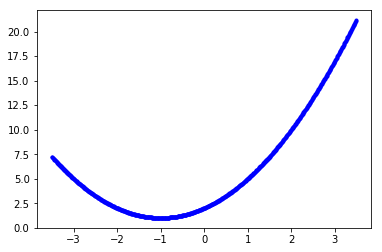

In [2]:
# Create a toy data set for testing purpose
#x1 = np.arange(0.0, 7, 0.01)
#x2 = np.random.normal(size = len(x1))
#x3 = np.random.uniform(1, 2, size = len(x1))
#y = x1 * 2 + x2 + x3 + 2
x1 = np.arange(-3.5, 3.5, 0.01)
np.random.shuffle(x1)
x2 = [i**2 for i in x1]
x3 = [i**3 for i in x1]
x4 = [i**4 for i in x1]
x5 = [i**5 for i in x1]
# target function
y = x1 * 2 + x2 + 2
# target curve
plt.plot(x1, y, '.', color='b')
# proper capacity
df = pd.DataFrame({"x1":x1, "x2":x2, "y":y})
# smaller capacity
#df = pd.DataFrame({"x1":x1, "y":y})
# larger capacity
#df = pd.DataFrame({"x1":x1, "x2":x2, "x3":x1, "x3":x3, "x4":x4, "x5":x5, "y":y})

In [3]:
# Split of training and testing
df_train = df.iloc[0:500, :]
df_test = df.iloc[501:, :]

In [4]:
# Mean squared error function
def mean_sqr_error(y, y_hat):
    n = y.shape[0]
    error = sum((y - y_hat) ** 2) / n
    return(error)

    
# Derivative of squared error
def gradient(y, y_hat, x):
    d = -np.array(x).T.dot(y - y_hat)
    return(d)


# Initialise weight vector function   
def init_weight(n_vars):
    weight = np.random.normal(size = n_vars)
    return(weight)


# Prediction function
def predict(weight, x):
    y_hat = x.dot(weight)
    return(y_hat)


In [5]:
# The main SGD function
def SGD(x,
        y,
        batch_size = 5,     # number of observatin per batch
        eta = 0.001,        # learning rate
        delta_min = 0.0001, # minimum error to terminate SGD
        epoch_max = 20):    # max epoch
    

    # Initialise variables 
    n_obs = x.shape[0]          # number of observations
    x_index = np.arange(n_obs)  # row index for X
    epoch_error = []            # to record error    
    x['bias'] = 1.0             # add biases to the original X matrix
    n_vars = x.shape[1]         # get number of variables in X    
    n_batch = int(n_obs / batch_size)   # find out the number of batches
    weight = init_weight(n_vars)        # initialise weight vector
  

    # Iterate through epoch
    for epoch in range(epoch_max):       
        # Initialise delta weight
        weight_delta = np.zeros(weight.shape)        
        # Interate through batches 
        for batch in range(n_batch):            
            # Randomly sample observations from X without replacements
            batch_index = np.random.choice(x_index, size = batch_size, replace = False)
            x_batch = x.iloc[batch_index, :]
            y_batch = y[batch_index]           
            # Iterate through every observations in the batch
            for i in range(batch_size):                
                xi = x_batch.iloc[i, :] 
                yi = y_batch.iloc[i]                
                y_hat = predict(weight, xi)     # calculate y_hat
                weight_delta = weight_delta + gradient(y = yi, y_hat = y_hat, x = xi)   # calculate gradiant            
            # update the weight vector after batch ends
            weight = weight - eta * (weight_delta / batch_size)        
        # re-estimate y_hat after each epoch and record error (mse)
        y_hat = predict(weight, x)
        error = mean_sqr_error(y, y_hat)
        epoch_error.append(error)
        print(error)        
        # if the error is small enough, terminate the process        
        if error <= delta_min:
            break    
    # Return weight and error log    
    return({"weight":weight, "error":epoch_error})

2.7805090812902558
2.4983205407549054
2.324085020392542
1.9345903574959422
1.7928926162575067
1.5950486784892792
1.417723104520771
1.2391678871326077
1.1319055307578387
0.9987440704465316
0.8799581770073233
0.7968164959894677
0.6873242043979398
0.6204676114518081
0.549574362872665
0.49199566909327125
0.4401717257451548
0.3928681674419873
0.353364743073125
0.3142349157672654
0.27896500715039374
0.2523142902231434
0.2227623576637979
0.20056578475418604
0.18283304081029447
0.1630380960827577
0.1452466737318654
0.13086031547997432
0.11570475227113551
0.1036308691433241
0.0920509632083233
0.08227670387474896
0.07365204204358208
0.065395000507791
0.058481275082378874
0.05248431367618282
0.04674943273083185
0.04194803372921996
0.03714749333451277
0.03298928195716283
0.030097726152920327
0.026956037790444663
0.023808169562108426
0.021217842626711746
0.01896661056862925
0.016884531142320285
0.015065176887117374
0.01345800029098632
0.011971458929429005
0.010644583260270256
0.009874630144728837
0

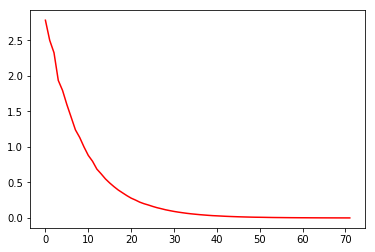

In [6]:
# Feed training set to SGD and build model
x_train = df_train.iloc[:, 0:df_train.shape[1]-1]
y_train = df_train.y
model = SGD(x_train, y_train, batch_size = 10, eta = 0.0001, delta_min = 0.001, epoch_max = 100) # proper or smaller capacity
#model = SGD(x_train, y_train, batch_size = 10, eta = 0.0000001, delta_min = 0.001, epoch_max = 100)  # larger capacity
# plot loss function(MSE) curve
plt.plot(model['error'], color='r')
weight = model['weight']

In [7]:
# Get testing set and make prediction
x_test = df_test.iloc[:, 0:df_test.shape[1]-1]
y_test = df_test.y
x_test = x_test.copy()
x_test['bias'] = 1    
y_hat_test = predict(weight, x_test)    

In [8]:
# Print mse of the test
mean_sqr_error(y_test, y_hat_test)

0.000898611084546389

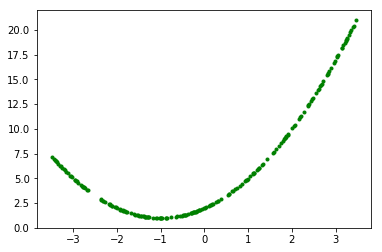

In [9]:
# Plot actual
plt.plot(df_test['x1'], df_test['y'], '.', color='g')

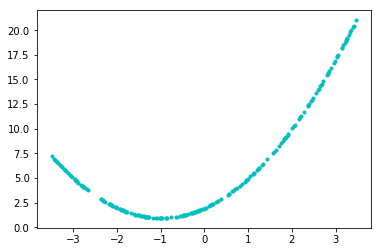

In [10]:
# Plot predicted
df_test = df_test.copy()
df_test.loc[:, 'y_hat'] = y_hat_test
plt.plot(df_test['x1'], df_test['y_hat'], '.', color='c') 

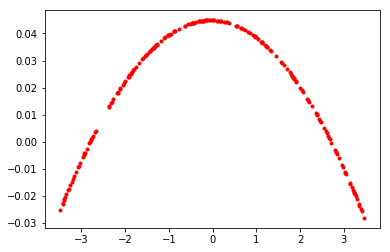

In [11]:
# plot test error curve
plt.plot(df_test['x1'], df_test['y'] - df_test['y_hat'], '.', color='r')

In [12]:
# compare with closed form solution
print(weight)
#np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train)

[2.00052951 1.00591712 1.95511061]
